In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display as ipydisplay

# Bereinigte Daten laden
df = pd.read_csv('../data/processed/co2_cleaned_total.csv')

In [2]:
# Länderfokus: G7 + EU-Kernstaaten + globale CO₂-Spitzenverursacher + zusätzliche Länder

g7 = ['United States', 'Germany', 'France', 'Canada', 'Italy', 'Japan', 'United Kingdom']
eu_core = ['Spain', 'Poland', 'Netherlands', 'Sweden']
top_emitters = df.groupby('Country')['Total'].sum().nlargest(10).index.tolist()
extra_countries = ['Vietnam', 'Malaysia', 'Singapore', 'United Arab Emirates']

selected_countries = sorted(set(g7 + eu_core + top_emitters + extra_countries))
print(f"Anzahl ausgewählter Länder: {len(selected_countries)}")
print(selected_countries)

Anzahl ausgewählter Länder: 21
['Canada', 'China', 'France', 'Germany', 'Global', 'India', 'International Transport', 'Italy', 'Japan', 'Malaysia', 'Netherlands', 'Poland', 'Russia', 'Singapore', 'Spain', 'Sweden', 'USA', 'United Arab Emirates', 'United Kingdom', 'United States', 'Vietnam']


In [3]:
# Einheitliche Farben für alle Länderdarstellungen
country_colors = {
    'China': 'red',
    'United States': 'blue',
    'India': 'orange',
    'Russia': 'green',
    'Japan': 'purple',
    'Germany': 'black',
    'Canada': 'brown',
    'United Kingdom': 'magenta',
    'France': 'cyan',
    'Brazil': 'teal',
    'Poland': 'olive',
    'Spain': 'darkblue',
    'Netherlands': 'gold',
    'Sweden': 'darkgreen',
    'Vietnam': 'darkred',
    'Malaysia': 'pink',
    'Singapore': 'grey',
    'United Arab Emirates': 'darkorange'
}

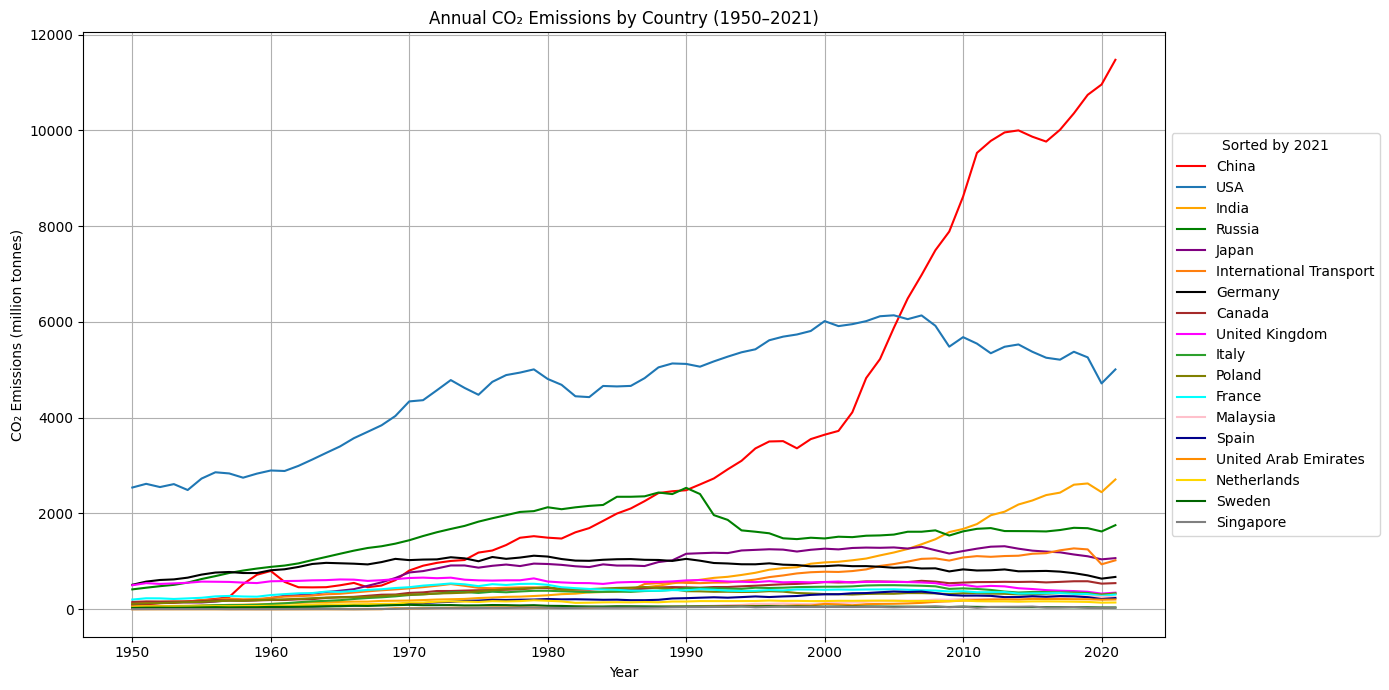

In [4]:
# Nur ausgewählte Länder
df_selected = df[df['Country'].isin(selected_countries)]

# "Global" ausblenden
df_selected = df_selected[df_selected['Country'] != 'Global']

# Gruppieren nach Jahr und Land
grouped = df_selected.groupby(['Year', 'Country'])['Total'].sum().unstack()

# Letztes Jahr ermitteln
last_year = grouped.index.max()
latest_values = grouped.loc[last_year].sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))
for country in latest_values.index:
    color = country_colors.get(country)
    plt.plot(grouped.index, grouped[country], label=country, color=color)

plt.title(f'Annual CO₂ Emissions by Country (1950–{last_year})')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.legend(title=f'Sorted by {last_year}', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)
plt.show()

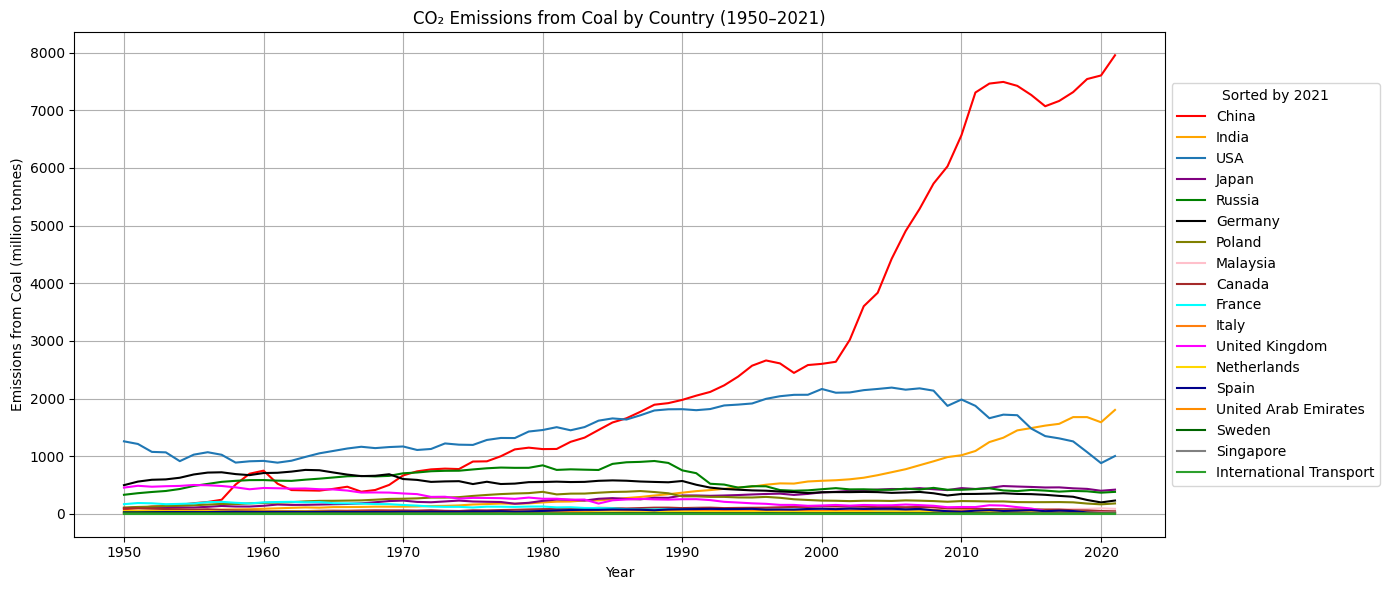

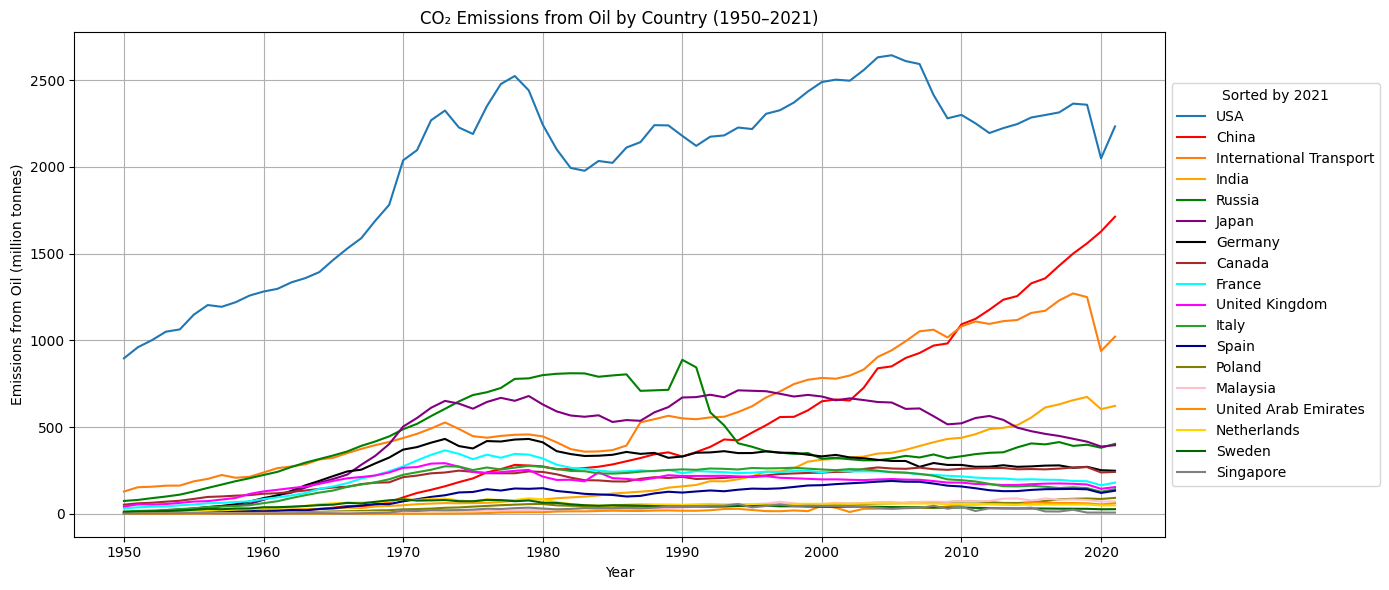

In [7]:
# Nur ausgewählte Länder
df_selected = df[df['Country'].isin(selected_countries)]
df_selected = df_selected[df_selected['Country'] != 'Global']

# Gruppieren: Summe von Coal/Oil pro Jahr und Land
coal_data = df_selected.groupby(['Year', 'Country'])['Coal'].sum().unstack()
oil_data = df_selected.groupby(['Year', 'Country'])['Oil'].sum().unstack()

# Letztes Jahr ermitteln
last_year = df_selected['Year'].max()

# Plot: Coal
# Länder sortieren nach Emissionen im letzten Jahr (Coal)
sorted_coal_countries = coal_data.loc[last_year].sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
for country in sorted_coal_countries:
    color = country_colors.get(country)
    plt.plot(coal_data.index, coal_data[country], label=country, color=color)

plt.title(f'CO₂ Emissions from Coal by Country (1950–{last_year})')
plt.xlabel('Year')
plt.ylabel('Emissions from Coal (million tonnes)')
plt.legend(title=f'Sorted by {last_year}', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Oil
# Länder sortieren nach Emissionen im letzten Jahr (Oil)
sorted_oil_countries = oil_data.loc[last_year].sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
for country in sorted_oil_countries:
    color = country_colors.get(country)
    plt.plot(oil_data.index, oil_data[country], label=country, color=color)

plt.title(f'CO₂ Emissions from Oil by Country (1950–{last_year})')
plt.xlabel('Year')
plt.ylabel('Emissions from Oil (million tonnes)')
plt.legend(title=f'Sorted by {last_year}', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Tabelle mit Total + Fuel-Typen pro Land im letzten Jahr (inkl. Global)
columns_of_interest = ['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']

# Filter auf ausgewählte Länder + Global und letztes Jahr
df_with_global = df[df['Country'].isin(selected_countries + ['Global'])]
df_latest = df_with_global[df_with_global['Year'] == last_year][columns_of_interest]

# Gruppieren und Summieren nach Land
latest_table = df_latest.groupby('Country').sum(numeric_only=True).sort_values(by='Total', ascending=False).reset_index()

# Spalten schöner benennen
latest_table.rename(columns={
    'Total': f'Total ({last_year})',
    'Coal': 'Coal',
    'Oil': 'Oil',
    'Gas': 'Gas',
    'Cement': 'Cement',
    'Flaring': 'Flaring',
    'Other': 'Other'
}, inplace=True)

# Titel anzeigen
ipydisplay(Markdown(f"### CO₂ Emissions by Country in {last_year} (million tonnes) – by Fuel Type (including Global)"))

# Formatierte Tabelle anzeigen
display(
    latest_table.style.format({
        f'Total ({last_year})': '{:,.2f}',
        'Coal': '{:,.2f}',
        'Oil': '{:,.2f}',
        'Gas': '{:,.2f}',
        'Cement': '{:,.2f}',
        'Flaring': '{:,.2f}',
        'Other': '{:,.2f}'
    })
)

### CO₂ Emissions by Country in 2021 (million tonnes) – by Fuel Type (including Global)

,Country,Year,Total (2021),Coal,Oil,Gas,Cement,Flaring,Other
0,Global,2021,"37,123.85","14,979.60","11,837.16","7,921.83","1,672.59",416.53,296.15
1,China,2021,"11,472.37","7,955.99","1,713.34",773.87,852.96,4.68,171.54
2,USA,2021,"5,007.34","1,002.30","2,233.78","1,637.04",41.20,67.68,25.33
3,India,2021,"2,709.68","1,802.31",622.15,133.45,149.00,2.77,0.00
4,Russia,2021,"1,755.55",380.23,403.08,875.05,21.92,58.92,16.35
5,Japan,2021,"1,067.40",418.82,395.36,221.53,23.79,0.34,7.56
6,International Transport,2021,"1,021.75",0.00,"1,021.75",0.00,0.00,0.00,0.00
7,Germany,2021,674.75,230.22,248.20,173.48,13.23,1.81,7.81
8,Canada,2021,545.63,43.86,241.66,235.38,6.62,16.06,2.05
9,United Kingdom,2021,346.77,23.69,154.11,158.86,3.90,3.47,2.74
